<a href="https://colab.research.google.com/github/phaniel1111/image-tools/blob/main/dominant_colors_using_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import requests
from io import BytesIO

# Mục mới

In [75]:
def load_image_from_url(image_url, max_size=500):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))

    width, height = image.size

    aspect_ratio = width / height

    new_width = min(max_size, int(max_size * aspect_ratio))
    new_height = min(max_size, int(max_size / aspect_ratio))

    image = image.resize((new_width, new_height), Image.ANTIALIAS)

    return np.array(image)

def preprocess_image(image):
    # Flatten the image into a list of RGB pixels
    return image.reshape(-1, 3)

def find_dominant_colors(image_path, num_colors=5):
    pixels = preprocess_image(image)

    kmeans = KMeans(n_clusters=num_colors, random_state=42, n_init=10)
    kmeans.fit(pixels)

    dominant_colors = kmeans.cluster_centers_.astype(int)

    return dominant_colors

def plot_colors(colors):
    image = np.zeros((100, 100, 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        image[:, i * 20:(i + 1) * 20] = color
    fig, ax = plt.subplots(figsize=(8, 4))
    border_color = [0, 0, 0]
    border_width = 10
    rect = plt.Rectangle((0, 0), image.shape[1], image.shape[0], linewidth=border_width, edgecolor=border_color, facecolor='none')
    ax.add_patch(rect)
    ax.imshow(image)
    ax.axis('off')



In [76]:
image_url = input("Image url:")
image = load_image_from_url(image_url)

dominant_colors = find_dominant_colors(image, num_colors=5)
print("Dominant Colors (RGB):")
print(dominant_colors)

Image url:https://m.media-amazon.com/images/M/MV5BOTFhNzc2MGMtZGUwYi00ZWFjLThlOWEtNDdmYTQyZjc3NDQ4XkEyXkFqcGdeQXVyMDM2NDM2MQ@@._V1_.jpg
Dominant Colors (RGB):
[[ 45  63  87]
 [185 144 118]
 [ 34  20  17]
 [113  67  45]
 [242 240 242]]


In [79]:
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])

hex_colors = [rgb_to_hex(rgb) for rgb in dominant_colors]
print(hex_colors)

['#2d3f57', '#b99076', '#221411', '#71432d', '#f2f0f2']


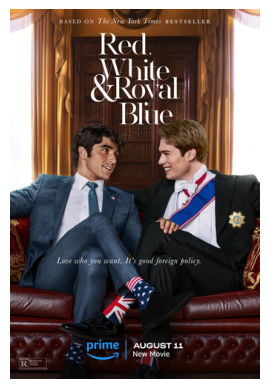

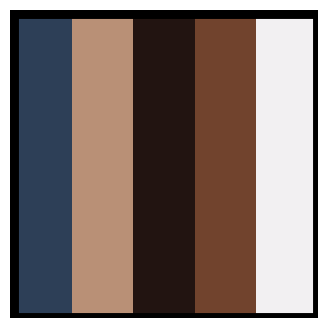

In [77]:
plt.imshow(image)
plt.axis('off')
plt.show()

# Visualize the dominant colors
plot_colors(dominant_colors)


KeyboardInterrupt: ignored